# Рынок заведений общественного питания Москвы

## Описание проекта

Мы рассматриваем возможность открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?  
  
Просмотрев открытые данные о заведениях общественного питания в Москве, мы должны подготовить исследование с презентацией.

## Знакомство с данными

### Предварительные настройки и подгрузка библиотек

Убираем предупреждения.

In [7]:
import warnings
warnings.filterwarnings('ignore')

Подгружаем библиотеки.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime, timedelta
%matplotlib inline
import scipy.stats as stats
import re
from io import BytesIO
import requests

Устанавливаем параметры по умолчанию.

In [9]:
pd.set_option('max_rows', 10)
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.float_format', '{:.2f}'.format)

Подгружаем файлы.

In [10]:
try:
    data = pd.read_csv('/datasets/rest_data.csv')
except:
    data = pd.read_csv('rest_data.csv')

Подгрузим информацию об улицах.

In [11]:
spreadsheet_id = '1NrBv6hsJKdtKOCqBeskqbvQHhzDtcI8rrmhhRylvHKs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content), encoding='utf8')
streets.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Посмотрим на структуру данных.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


База данных содержит 15366 строк и 6 полей.  
2 поля представлены в формате целого числа, 4 в формате текста.  
Пропущенные значения отсутствуют.

In [13]:
data.sample(10)

,id,object_name,chain,object_type,address,number
14152,204965,Пекарня,нет,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 86, корпус 1",0
3472,153105,Муракамэ,нет,ресторан,"город Москва, Ленинградский проспект, дом 47, строение 2",60
11477,186952,Донер кебаб,нет,предприятие быстрого обслуживания,"город Москва, улица Ленинская Слобода, дом 26, строение 2",0
1405,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35
10455,174446,Black Swan pub&shop,нет,кафе,"город Москва, улица Солянка, дом 1/2, строение 1",90
12094,187928,Даблби,нет,кафе,"город Москва, Пресненская набережная, дом 2",0
14093,208702,EateriaKitchen (Паста),нет,кафе,"город Москва, Нижняя Красносельская улица, дом 35, строение 59",10
6669,139560,Чайхона №1,да,ресторан,"город Москва, площадь Киевского Вокзала, дом 2",48
11126,186753,Кафе,нет,кафе,"город Москва, Студёный проезд, дом 7Б",15
15028,215653,Сказка Бутово,нет,ресторан,"город Москва, Изюмская улица, дом 52А",50


Значения полей:  
- id - уникальный идентификационный номер заведения;
- object_name - название;
- chain - является ли сетью;
- object_type - тип;
- address - адрес;
- number - количество посадочных мест;

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15366.00,119720.07,73036.13,838.00,28524.00,144974.50,184262.25,223439.00
number,15366.00,59.55,74.74,0.00,12.00,40.00,80.00,1700.00


Посмотрим, что это за заведения с таким большим количеством посадочных мест.

In [15]:
data.query('number == 1700')

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700


Судя по информации из сети, все ок. Посмотрим на количество уникальных значений.

In [16]:
data.object_name.nunique()

10393

In [17]:
round((data.object_name.nunique() / len(data.object_name)), 2) * 100

68.0

10393 заведения или 68% имеют уникальные названия.  
Посмотрим сколько всего сетевых.

In [18]:
data.query('chain == "да"').chain.count()

2968

2968 являются сетями.

In [19]:
round((data.query('chain == "да"').chain.count() / len(data.object_name)), 2) * 100

19.0

Или 19% от общего числа.

### Выводы по разделу
- Данные не содержат пропусков.  
- Потребуется выделить улицы в отдельный столбец.
- Потребуется проверить на дубликаты.

## Предобработка данных

### Выносим улицы в отдельный столбец.

Еще раз посмотрим на данные.

In [20]:
data.sample(5)

,id,object_name,chain,object_type,address,number
5574,21580,Столовая ШК.1752,нет,столовая,"город Москва, Большая Остроумовская улица, дом 7",160
12763,197489,Кулинария,нет,магазин (отдел кулинарии),"город Москва, проспект Мира, дом 102, корпус 1",4
4306,28690,СТОЛОВАЯ ПРИ ФИНАНСОВОЙ АКАДЕМИИ,нет,столовая,"город Москва, улица Кибальчича, дом 1",30
2088,73115,Ресторан Джон Джоли,да,ресторан,"город Москва, Пятницкая улица, дом 29",180
6849,127432,МЕНЗА,да,ресторан,"город Москва, Щукинская улица, дом 42",66


Улица отделена запятыми, попробуем ее вытащить, для этого обратимся к регулрным выражениям.  
Сперва напишем функцию.

In [21]:
def get_street(add):
    return re.split(r', ', add)[1]

Применим ее к таблице.

In [22]:
data['street'] = data.address.apply(get_street)

In [23]:
data.sample(5)

,id,object_name,chain,object_type,address,number,street
4579,28085,Столовая ГНУ ВИЭСХ,нет,столовая,"город Москва, 1-й Вешняковский проезд, дом 2, строение 1",20,1-й Вешняковский проезд
11231,176768,Кофе,нет,кафе,"город Москва, Большая Семёновская улица, дом 49А",2,Большая Семёновская улица
3521,152431,Spy Moscow,нет,ресторан,"город Москва, 1-я Брестская улица, дом 2, строение 3",170,1-я Брестская улица
9099,19715,Комбинат питаная ВАГШ,нет,столовая,"город Москва, проспект Вернадского, дом 100, корпус ЗОНА, строение С-1",172,проспект Вернадского
13989,207274,Пивовар,нет,бар,"город Москва, Кантемировская улица, дом 7, корпус 1",8,Кантемировская улица


Вроде все ок.

### Проверить на дубликаты.

In [24]:
data.duplicated().sum()

0

Явных дубликатов нет.

### Проверка уникальных названий вида объекта.

In [25]:
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Кафе и кафетерий звучит одинаково, приведем к единому значению.

In [26]:
data['object_type'] = data['object_type'].replace('кафетерий', 'кафе')
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'буфет', 'бар',
       'магазин (отдел кулинарии)'], dtype=object)

### Выводы по разделу
Мы определились с отсутствием дубликатов и вытащили улицу в отдельный столбец.  
Так же мы заменили вид объектов кафетерий на кафе.  
Теперь можно приступить к анализу.  

## Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству. 

Сперва соберем сводную таблицу.

In [27]:
pivot_obj_type = (data
                      .pivot_table(index='object_type', values='id', aggfunc='count')
                      .sort_values(by='id', ascending=False)
                      .reset_index())
pivot_obj_type.columns = ['object_type', 'count']
pivot_obj_type

,object_type,count
0,кафе,6497
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,закусочная,360
7,магазин (отдел кулинарии),273


Посмотрим на графике.

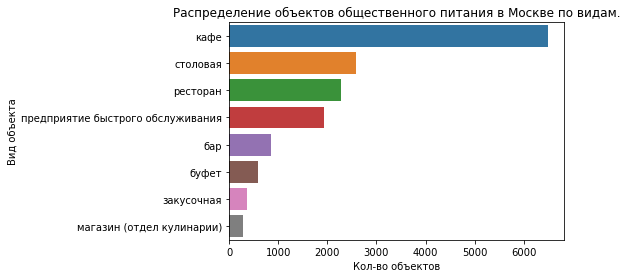

In [28]:
ax = sns.barplot(
    y='object_type', 
    x='count',
    data=pivot_obj_type)

plt.xlabel('Кол-во объектов')
plt.ylabel('Вид объекта')
plt.title('Распределение объектов общественного питания в Москве по видам.')
plt.show()

#### Краткий вывод
Топ 3 выгляди так:
- Кафе - 6497;
- Столовая - 2587;
- Ресторан - 2285;

### Исследуем соотношение сетевых и несетевых заведений по количеству.

Сперва соберем сводную таблицу.

In [29]:
pivot_obj_type_chain = (data
                      .pivot_table(index=['object_type', 'chain'], values='id', aggfunc='count')
                      .sort_values(by='id', ascending=False)
                      .reset_index())
pivot_obj_type_chain.columns = ['object_type', 'chain', 'count']
pivot_obj_type_chain

,object_type,chain,count
0,кафе,нет,5049
1,столовая,нет,2584
2,ресторан,нет,1741
3,кафе,да,1448
4,предприятие быстрого обслуживания,нет,1132
...,...,...,...
11,магазин (отдел кулинарии),да,78
12,закусочная,да,56
13,бар,да,37
14,буфет,да,11


Посмотрим на графике.

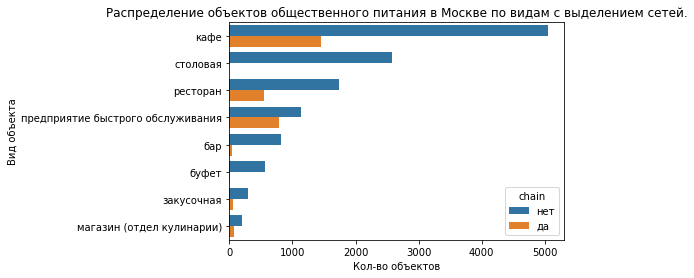

In [30]:
sns.barplot(
    y='object_type', 
    x='count', 
    hue='chain',
    data=pivot_obj_type_chain)

plt.xlabel('Кол-во объектов')
plt.ylabel('Вид объекта')
plt.title('Распределение объектов общественного питания в Москве по видам с выделением сетей.')
plt.show()

#### Краткий вывод
- кафе лидируют среди всех видов объектов;
- на втором месте для сетей - предприятия быстрого питания, для прочих - столовые;
- хуже всех у сетей себя показывают столовые и буфеты;
- хуже всех у не сетей себя показывают закусочные и магазины кулинарии;

### Посмотрим для какого вида объекта общественного питания характерно сетевое распространение.

Сперва соберем данные по сетевым заведениям.

In [35]:
data_chains = data.query('chain == "да"')

In [36]:
data_chains_p = (data_chains
 .pivot_table(index='object_type', values='id', aggfunc='count')
 .sort_values(by='id', ascending=False)
 .reset_index())

Теперь по всем заведениям.

In [44]:
data_all_p = (data
 .pivot_table(index='object_type', values='id', aggfunc='count')
 .sort_values(by='id', ascending=False)
 .reset_index())

In [46]:
data_chains_most = data_chains_p.merge(data_all_p, left_on='object_type', right_on='object_type')
data_chains_most.columns = ['object_type', 'chain', 'all']
data_chains_most['chain_to_all'] = data_chains_most['chain'] / data_chains_most['all']
data_chains_most = data_chains_most.sort_values(by='chain_to_all', ascending=False)
data_chains_most

,object_type,chain,all,chain_to_all
1,предприятие быстрого обслуживания,791,1923,0.41
3,магазин (отдел кулинарии),78,273,0.29
2,ресторан,544,2285,0.24
0,кафе,1448,6497,0.22
4,закусочная,56,360,0.16
5,бар,37,856,0.04
6,буфет,11,585,0.02
7,столовая,3,2587,0.00


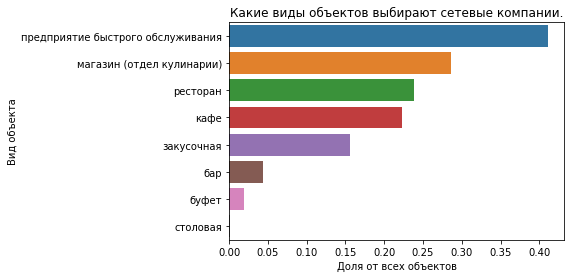

In [49]:
sns.barplot(
    y='object_type', 
    x='chain_to_all',
    data=data_chains_most)

plt.xlabel('Доля от всех объектов')
plt.ylabel('Вид объекта')
plt.title('Какие виды объектов выбирают сетевые компании.')
plt.show()

#### Краткий вывод
Сетевые компании выбирают в первую очередь <b>предприятия быстрого питания</b>.<br>
    Так же у них в ходу <b>отделы кулинарии в магазине, рестораны и кафе</b>.<br>
    Хуже всего у сетей развивается <b>бар, буфет и столовая</b>.

### Посмотрим что характерно для сетевых заведений. 
Много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

In [27]:
data_chains.sample(5)

,id,object_name,chain,object_type,address,number,street
2740,150444,KFC,да,предприятие быстрого обслуживания,"город Москва, улица Арбат, дом 9, строение 1",50,улица Арбат
3893,136091,Бургер Кинг,да,ресторан,"город Москва, улица Земляной Вал, дом 26, строение 1",50,улица Земляной Вал
5034,80140,Жан Жак,да,кафе,"город Москва, улица Тимура Фрунзе, дом 11, строение 44",64,улица Тимура Фрунзе
9261,166556,Кафе Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 7, корпус 1",8,Варшавское шоссе
7685,84473,Кафе «Теремок»,да,предприятие быстрого обслуживания,"город Москва, Каширское шоссе, дом 14",86,Каширское шоссе


In [28]:
data_chains_pivot = (data_chains.pivot_table(
                                index='object_name',
                                values=['number'],
                                aggfunc=['count', 'sum'])
                     .reset_index()
)
data_chains_pivot.columns = ['name', 'count', 'seats_sum']
data_chains_pivot = data_chains_pivot.sort_values(by='count', ascending=False)
data_chains_pivot['seats_one_obj'] = data_chains_pivot['seats_sum'] / data_chains_pivot['count']
data_chains_pivot.head(5)

,name,count,seats_sum,seats_one_obj
30,KFC,155,8578,55.34
702,Шоколадница,141,7920,56.17
418,Макдоналдс,122,9943,81.50
127,Бургер Кинг,122,5492,45.02
195,Домино'с Пицца,86,1566,18.21


Мы подготовили таблицу, посмотрим на корреляцию.

In [29]:
data_chains_pivot[['count', 'seats_sum', 'seats_one_obj']].corr()

,count,seats_sum,seats_one_obj
count,1.00,0.85,-0.04
seats_sum,0.85,1.00,0.16
seats_one_obj,-0.04,0.16,1.00


Судя по всему величина сети никак не влияет на кол-во мест, попробуем посмотреть каждый столбец детальнее.  
Для этого используем функцию.

In [30]:
def rare_values(df):
    numerics = (['int8', 'int16', 'int32', 'int64', 
                 'uint8', 'uint16', 'uint32', 'uint64',
                 'float16', 'float32', 'float64'])
    if isinstance(df, pd.Series):
        df = df.to_frame()
    df_test = df.select_dtypes(include=numerics)   
    for col in df_test.columns:
        q1 = df_test[col].quantile(0.25)
        q3 = df_test[col].quantile(0.75)
        p95 = int(df_test[col].quantile(0.95))
        p99 = int(df_test[col].quantile(0.99))
        p_max = df_test[col].max()
        iqr = q3 - q1
        bot_border = q1 - iqr*1.5
        top_border = q3 + iqr*1.5
        rare_values_bot = df.query(f'{col} < @bot_border')[col].count()
        rare_values_top = df.query(f'{col} > @top_border')[col].count()
        print (f'Колонка - {col}\n'
                f'Первый квартиль = {q1}\n'
                f'Третий квартиль = {q3}\n'
                f'Значение 95% = {p95}\n'
                f'Значение 99% = {p99}\n'
                f'Максимальное значение = {p_max}\n'
                f'Нижняя граница = {bot_border}, Верхняя граница = {top_border}\n'
                f'Редкие значения меньше нижней границы = {rare_values_bot}\n'
                f'Редкие значения больше верхней границы = {rare_values_top}\n'
              )

Сперва применим метод `describe`.

In [31]:
data_chains_pivot.describe().T

,count,mean,std,min,25%,50%,75%,max
count,724.00,4.10,12.63,1.00,1.00,1.00,2.00,155.00
seats_sum,724.00,216.94,718.90,0.00,30.00,70.00,150.00,9943.00
seats_one_obj,724.00,60.32,56.13,0.00,20.00,45.00,83.62,356.00


- Мы видим, что большая часть сетей имеет по 1-2 заведению.  
- Количество сидячих мест на одно заведение варьируется от 0 до 356.  
  
Применим функцию.

In [32]:
rare_values(data_chains_pivot)

Колонка - count
Первый квартиль = 1.0
Третий квартиль = 2.0
Значение 95% = 12
Значение 99% = 64
Максимальное значение = 155
Нижняя граница = -0.5, Верхняя граница = 3.5
Редкие значения меньше нижней границы = 0
Редкие значения больше верхней границы = 131

Колонка - seats_sum
Первый квартиль = 30.0
Третий квартиль = 150.0
Значение 95% = 784
Значение 99% = 3010
Максимальное значение = 9943
Нижняя граница = -150.0, Верхняя граница = 330.0
Редкие значения меньше нижней границы = 0
Редкие значения больше верхней границы = 83

Колонка - seats_one_obj
Первый квартиль = 20.0
Третий квартиль = 83.625
Значение 95% = 164
Значение 99% = 262
Максимальное значение = 356.0
Нижняя граница = -75.4375, Верхняя граница = 179.0625
Редкие значения меньше нижней границы = 0
Редкие значения больше верхней границы = 30



Разделим наши данные на 2 части:
- Сети с 1-2 объектами;
- Сети с больше чем 2 объектами;

In [33]:
data_chains_small = data_chains_pivot.query('count < 3')
data_chains_big = data_chains_pivot.query('count > 2')

Теперь посмотрим на эти объекты поподробнее.

In [34]:
len(data_chains_small.groupby('name'))

549

В выборку у нас попало 549 компаний.

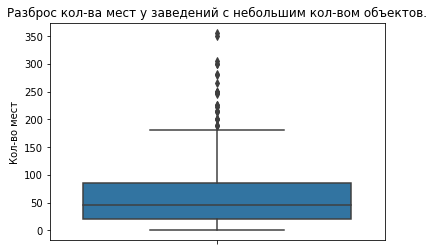

In [35]:
sns.boxplot(y='seats_one_obj' , data=data_chains_small)

plt.ylabel('Кол-во мест')
plt.title('Разброс кол-ва мест у заведений с небольшим кол-вом объектов.')
plt.show()

In [36]:
data_chains_small['seats_one_obj'].describe()

count   549.00
mean     60.98
std      58.62
min       0.00
25%      20.00
50%      45.00
75%      85.00
max     356.00
Name: seats_one_obj, dtype: float64

In [37]:
rare_values(data_chains_small['seats_one_obj'])

Колонка - seats_one_obj
Первый квартиль = 20.0
Третий квартиль = 85.0
Значение 95% = 175
Значение 99% = 281
Максимальное значение = 356.0
Нижняя граница = -77.5, Верхняя граница = 182.5
Редкие значения меньше нижней границы = 0
Редкие значения больше верхней границы = 25



Заведения с кол-вом объектов менее 3, предпочитают открывать точки с количеством мест от 20 до 85.  
Теперь разберем так же заведения с кол-вом объектов более 2х.

In [38]:
len(data_chains_big.groupby('name'))

175

Таких гораздо меньше, всего 175.

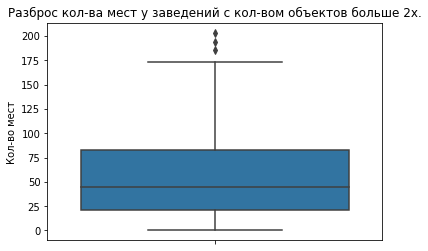

In [39]:
sns.boxplot(y='seats_one_obj' , data=data_chains_big)

plt.ylabel('Кол-во мест')
plt.title('Разброс кол-ва мест у заведений с кол-вом объектов больше 2х.')
plt.show()

In [40]:
data_chains_big['seats_one_obj'].describe()

count   175.00
mean     58.26
std      47.58
min       0.00
25%      20.92
50%      44.57
75%      82.96
max     203.33
Name: seats_one_obj, dtype: float64

In [41]:
rare_values(data_chains_big['seats_one_obj'])

Колонка - seats_one_obj
Первый квартиль = 20.915441176470587
Третий квартиль = 82.95833333333334
Значение 95% = 151
Значение 99% = 187
Максимальное значение = 203.33333333333334
Нижняя граница = -72.14889705882354, Верхняя граница = 176.02267156862746
Редкие значения меньше нижней границы = 0
Редкие значения больше верхней границы = 3



Тут примерно те же цифры, крупные сети предпочитают открывать объекты с количеством мест от 20 до 82. 

#### Краткий вывод
Вне зависимости от размера сети, больше всего в ходу заведения с количеством мест около 45-47.

### Какое количество посадочных мест характерно для каждого объекта общественного питания. 

Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? 

In [42]:
data.sample(1)

,id,object_name,chain,object_type,address,number,street
14059,222541,Oki Sushi,нет,магазин (отдел кулинарии),"город Москва, Литовский бульвар, дом 22",0,Литовский бульвар


Сделаем сводную таблицу.

In [43]:
data_obj = (data.pivot_table(
                                index='object_type',
                                values=['number'],
                                aggfunc=['count', 'sum'])
                .reset_index()
)
data_obj.columns = ['object_type', 'count', 'seats_sum']
data_obj['seats_one_obj'] = data_obj['seats_sum'] / data_obj['count']
data_obj = data_obj.sort_values(by='seats_one_obj', ascending=False)
data_obj

,object_type,count,seats_sum,seats_one_obj
7,столовая,2587,336948,130.25
6,ресторан,2285,221266,96.83
1,буфет,585,29911,51.13
0,бар,856,37231,43.49
3,кафе,6497,245859,37.84
5,предприятие быстрого обслуживания,1923,39522,20.55
2,закусочная,360,2739,7.61
4,магазин (отдел кулинарии),273,1526,5.59


Построим график.

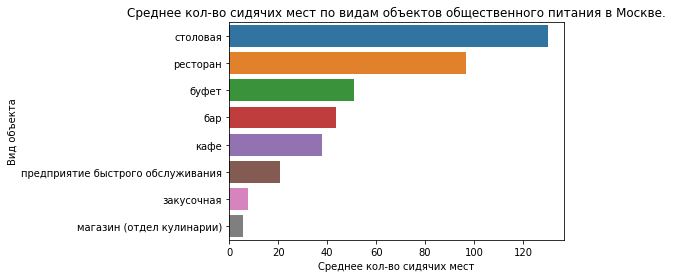

In [44]:
sns.barplot(
    y='object_type', 
    x='seats_one_obj',
    data=data_obj)

plt.xlabel('Среднее кол-во сидячих мест')
plt.ylabel('Вид объекта')
plt.title('Среднее кол-во сидячих мест по видам объектов общественного питания в Москве.')
plt.show()

#### Краткий вывод
- Среди видов объектов общественнного питания по кол-ву сидячих мест лидирует *Столовая*;
- В аутсайдерах оказался *магазин с отделом кулинарии* и *закусочная*;
- *Столовая* в среднем имеет 130 сидячих мест, *ресторан* - 96, что в два раза превышает среднее кол-во сидячих мест в *барах* и *буфетах*;

### Посмотрим на топ-10 улиц по кол-ву объектов общественного питания.
Так же определим в каком районе они расположены.

In [45]:
data.sample(1)

,id,object_name,chain,object_type,address,number,street
13210,200435,Кафе «Кофепорт»,нет,кафе,"город Москва, улица Сергея Макеева, дом 13",2,улица Сергея Макеева


In [46]:
data_streets = (data.pivot_table(
                                index='street',
                                values='id',
                                aggfunc='count')
                     .reset_index()
)
data_streets.columns = ['street', 'count']
data_streets = data_streets.sort_values(by='count', ascending=False)
data_streets.head(10)

,street,count
1334,город Зеленоград,232
1452,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1419,поселение Сосенское,138
1449,проспект Вернадского,132
674,Кутузовский проспект,114


In [47]:
data.query('street == "город Зеленоград"').head(5)

,id,object_name,chain,object_type,address,number,street
1386,22331,СТОЛОВАЯ МИЭТ,нет,столовая,"город Москва, город Зеленоград, улица Юности, дом 11",56,город Зеленоград
1405,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,город Зеленоград
1406,68113,Френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,город Зеленоград
1407,20105,Кафе «Граф Монте-Кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,город Зеленоград
1408,22982,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,город Зеленоград


И так у нас есть топ 10.  
Мы видим, что многие улицы представлены как поселения или города. При ближайшем рассмотрении мы видим, что ряд из них вовсе не имеет улиц. Попробуем исключить их из выборки для чистоты эксперемента.

Сперва напишем функцию.

In [48]:
def drop_town(line):
    drop = [
        'город',
        'поселение',
        'проспект',
        'шоссе'
    ]
    if re.split('\s+', line)[0] in drop:
        return 'не улица'
    elif re.split('\s+', line)[-1] in drop:
        return 'не улица'
    else:
        return line

Далее применим ее к нашим данным.

In [49]:
data_streets['street'] = data_streets['street'].apply(drop_town)

In [50]:
data_streets.query('street != "не улица"').head(10)

,street,count
993,Профсоюзная улица,182
979,Пресненская набережная,167
605,Кировоградская улица,110
1251,Ходынский бульвар,102
1751,улица Новый Арбат,92
1851,улица Сущёвский Вал,86
1674,улица Ленинская Слобода,85
1004,Пятницкая улица,80
1609,улица Земляной Вал,79
1531,улица Вавилова,78


Проспекты и шоссе так же требуется убрать, модернизируем нашу функцию.

In [51]:
data_streets['street'] = data_streets['street'].apply(drop_town)
data_streets.query('street != "не улица"').head(10)

,street,count
993,Профсоюзная улица,182
979,Пресненская набережная,167
605,Кировоградская улица,110
1251,Ходынский бульвар,102
1751,улица Новый Арбат,92
1851,улица Сущёвский Вал,86
1674,улица Ленинская Слобода,85
1004,Пятницкая улица,80
1609,улица Земляной Вал,79
1531,улица Вавилова,78


Вот это уже больше похоже на то, что мы ищем.

#### Краткий вывод
Вот как картина выглядит по районам:
- Профсоюзная улица - ЮЗАО
- Пресненская набережная - ЦАО
- Кировоградская улица - ЮАО
- Ходынский бульвар - САО
- улица Новый Арбат - ЦАО
- улица Сущёвский Вал - ЦАО, СВАО
- улица Ленинская Слобода - ЮАО
- Пятницкая улица - ЦАО
- улица Земляной Вал - ЦАО
- улица Вавилова - ЮАО, ЮЗАО  
  
Мы нашли топ 10 улиц по количеству заведений. Из внешних источников стало понятно, что они расположены в центре, либо не далеко от него. В основном преобладает ЦАО и ЮАО.

### Найдем число улиц с одним объектом общественного питания. 
Выясним в каких районах Москвы находятся эти улицы?  

In [52]:
data_streets_one = data_streets.query('(street != "не улица") & (count == 1)')

Добавим в новую таблицу названия районов и округов.

In [53]:
data_streets_one = data_streets_one.merge(streets, left_on='street', right_on='streetname', how='inner')
data_streets_one = data_streets_one.drop(['streetname'], axis = 1)

In [54]:
data_streets_one.head()

,street,count,areaid,okrug,area
0,улица Демьяна Бедного,1,92,СЗАО,Район Хорошево-Мневники
1,Андреево-Забелинская улица,1,22,ВАО,Район Богородское
2,1-й Саратовский проезд,1,121,ЮВАО,Район Текстильщики
3,Андроньевская площадь,1,18,ЦАО,Таганский район
4,2-й Стрелецкий проезд,1,78,СВАО,Район Марьина роща


создадим сводную таблицу по районам.

In [55]:
data_streets_area = data_streets_one.pivot_table(
    index='area',
    values='count',
    aggfunc='sum').reset_index()


data_streets_area.columns = ['area', 'count']
data_streets_area = data_streets_area.sort_values(by='count', ascending=False)
data_streets_area.head(10)

,area,count
93,Таганский район,27
79,Район Хамовники,26
3,Басманный район,25
94,Тверской район,20
20,Пресненский район,19
49,Район Марьина роща,17
21,Район Арбат,17
13,Мещанский район,16
73,Район Сокольники,15
33,Район Замоскворечье,14


А теперь нарисуем таблицу.

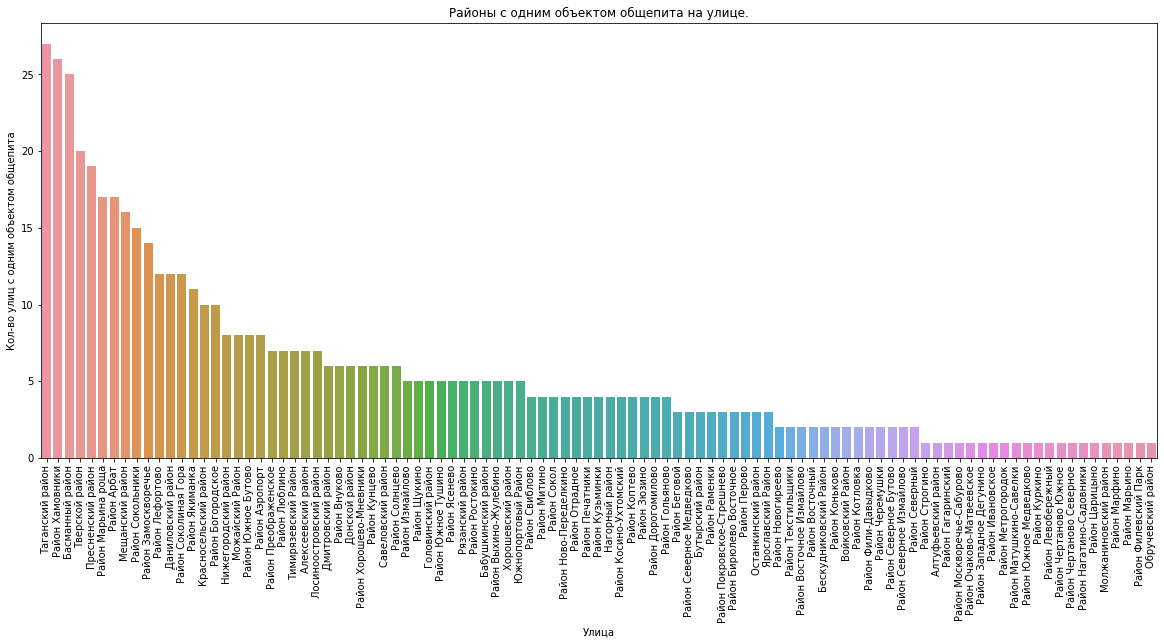

In [56]:
fig, barplot = plt.subplots(figsize = (20,8))
barplot = sns.barplot(
    y='count', 
    x='area',
    data=data_streets_area)

plt.ylabel('Кол-во улиц с одним объектом общепита')
plt.xlabel('Улица')
plt.title('Районы с одним объектом общепита на улице.')
plt.xticks(rotation=90)
plt.show()

Сделаем то же самое по округам.

In [57]:
data_streets_okrug = data_streets_one.pivot_table(
    index='okrug',
    values='count',
    aggfunc='sum').reset_index()


data_streets_okrug.columns = ['okrug', 'count']
data_streets_okrug = data_streets_okrug.sort_values(by='count', ascending=False)
data_streets_okrug

,okrug,count
6,ЦАО,185
0,ВАО,70
4,СВАО,66
3,САО,55
8,ЮВАО,53
1,ЗАО,41
7,ЮАО,30
9,ЮЗАО,27
5,СЗАО,25
2,Зеленоград,1


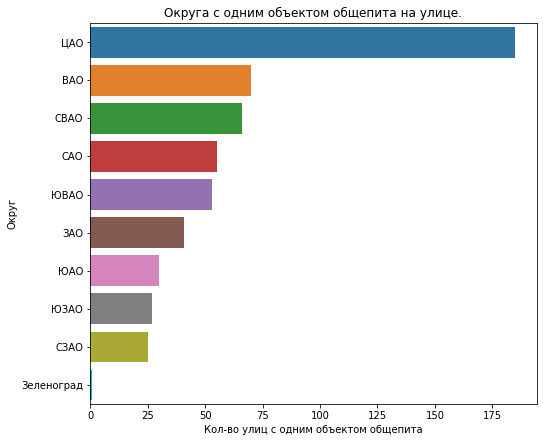

In [58]:
fig, barplot = plt.subplots(figsize = (8,7))
barplot = sns.barplot(
    x='count', 
    y='okrug',
    data=data_streets_okrug)

plt.xlabel('Кол-во улиц с одним объектом общепита')
plt.ylabel('Округ')
plt.title('Округа с одним объектом общепита на улице.')
plt.show()

#### Краткий вывод
Вот как картина выглядит топ 3 по районам:
- Таганский район
- Район Хамовники
- Басманный район
  
Среди округов приобладает ЦАО, остальные сильно отстают.

### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. 
Какие закономерности можно выявить?  

In [59]:
data_streets_clear = data_streets.query('street != "не улица"')

In [60]:
rare_values(data_streets_clear)

Колонка - count
Первый квартиль = 1.0
Третий квартиль = 7.0
Значение 95% = 24
Значение 99% = 62
Максимальное значение = 182
Нижняя граница = -8.0, Верхняя граница = 16.0
Редкие значения меньше нижней границы = 0
Редкие значения больше верхней границы = 164



Предположим, что с большим - это выше 95%, т.е. от 24 объектов и выше.

In [61]:
data_streets_clear = data_streets_clear.query('count > 23')
data_streets_clear.street.count()

101

Создадим список улиц.

In [62]:
list_of_streets = data_streets_clear.street.tolist()

Теперь отфильтруем данные по улицам.

In [63]:
data_max_obj = data.query('street in @list_of_streets')

Можно начинать работать с таблицей.

In [64]:
data_max_obj.sample(1)

,id,object_name,chain,object_type,address,number,street
14919,222926,Дай краба,нет,кафе,"город Москва, Ходынский бульвар, дом 4",0,Ходынский бульвар


In [66]:
displot = sns.displot(x='number', data=data_max_obj)

plt.xlabel('Кол-во посадочных мест')
plt.ylabel('Кол-во заведений')
plt.title('Распределение посадочных мест по заведениям на самых популярных улицах.')
plt.show()

In [67]:
rare_values(data_max_obj['number'])

#### Краткий вывод
Судя по всему на самых оживленных улицах преобладают заведения с небольшим количеством мест или вовсе без них. Скорее всего сказывается нехватка пространства, учитывая, что это центральный район.

### Выводы по разделу
- Самым популярным объектом общественного питания являются кафешки с 50 посадочными местами, расположенные в центральном районе. 
- Большая часть объектов общественного питания являются несетевыми.
- Сети предпочитают открываться в людных местах, поближе к центру.
- Закусочные и отделы кулинарии в магазинах встречаются реже всего.
- В несетевом сегменте столовые занимают второе место, при этом среди сетей их практически нет.
- Для сетевых заведений больше характерно много заведений с небольшим кол-вом посадочных мест.

## Общие выводы по анализу
Данные, полученные для анализа в хорошем виде. Потребовалось выделить отдельно улицы и подгрузить из внешних источников округ и район. Так же мы прировняли кафе и кофетерий к единой записи - кафе.  

---
При анализе данных было определено, что самое большое скопление заведений находится в центральном районе, и расчитано на 45-50 мест.

---
Сети предпочитают придерживаться стандарта в 40-50 мест вне зависимости от величины сети.

---
При этом присутствуют аномалии с количеством мест около 500-600.

---

Большая часть заведений имеет несетевой характер.

---

Ссылка на презентацию.  
https://disk.yandex.ru/i/UsU3_ZGUPYHD5A